In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [25]:
dt = 0.001
t = np.arange(0,0.5,dt)
f1 = np.sin(2*np.pi*32*t)
f2 = f1 + 1.8*np.random.randn(len(t))

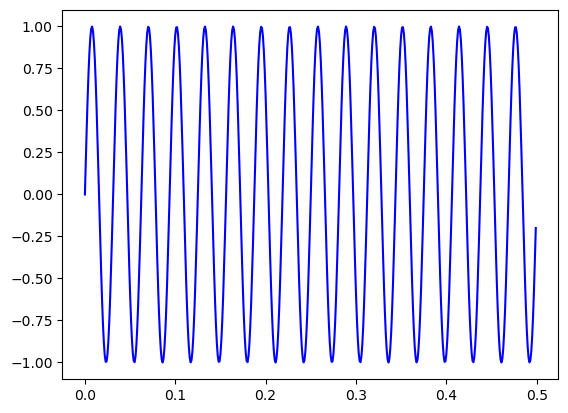

In [26]:
plt.plot(t,f1,color='b')

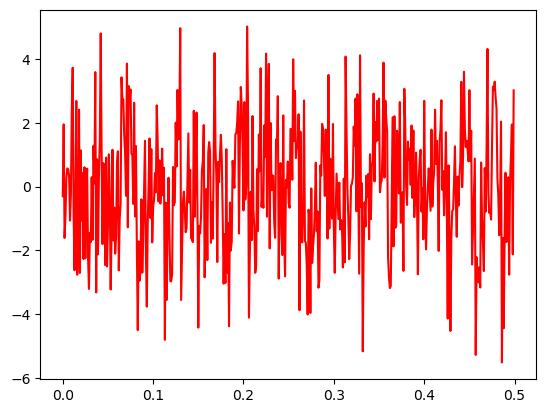

In [27]:
plt.plot(t,f2,color ='r')

# Computing the FFT!

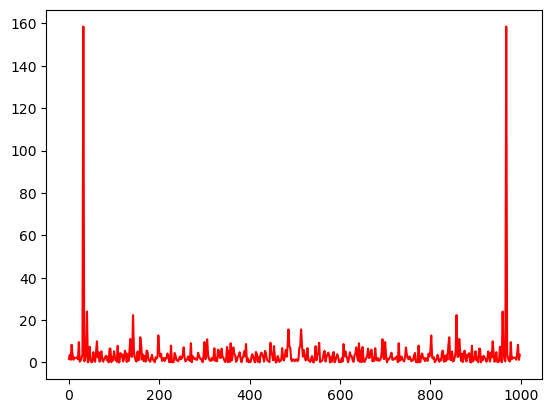

In [33]:
ft = np.fft.fft(f2,len(t)) #taking shit to time domain
Pow_dens = ft*np.conj(ft)/len(t)
freq = np.arange(len(t))*(1/(len(t)*dt))
plt.plot(freq,Pow_dens,color='r')

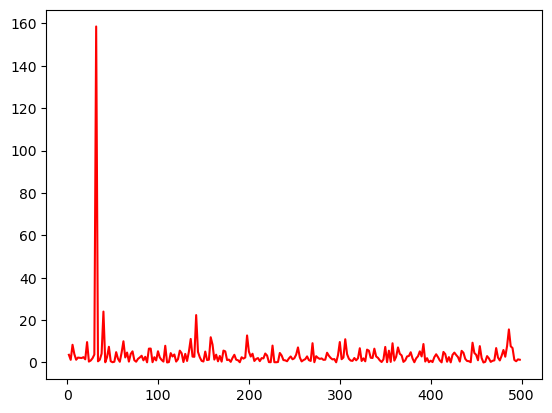

In [34]:
# we get 2 spikes instead of one cuz symmetrical and stuff so we only take first half..
L= np.arange(1,np.floor(len(t)/2),dtype='int')
plt.plot(freq[L],Pow_dens[L],color='r')

#BT Sorted 
Now we observe that the maximum freq of power is from point f = 32 (i.e the original freq) and we if we truncate all frequencies whose |P|<40 (as no other freq above 40 lol)

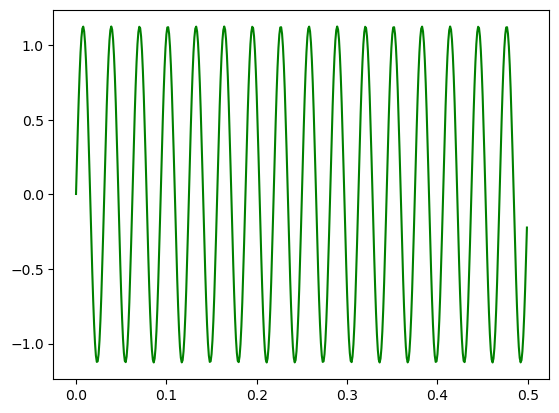

In [36]:
index = Pow_dens>40
Pow_new = Pow_dens * index
ft =  ft * index
f_clean = np.fft.ifft(ft) #back to time domain
plt.plot(t,f_clean,color='g')

In [37]:
def de_Noiser(f,t,dt):
    ft = np.fft.fft(f,len(t)) #taking shit to time domain
    Pow_dens = ft*np.conj(ft)/len(t)
    freq = np.arange(len(t))*(1/(len(t)*dt))
    index = Pow_dens>40
    Pow_new = Pow_dens * index
    ft =  ft * index
    f_clean = np.fft.ifft(ft) #back to time domain
    plt.plot(t,f_clean,color='g')
    return f_clean

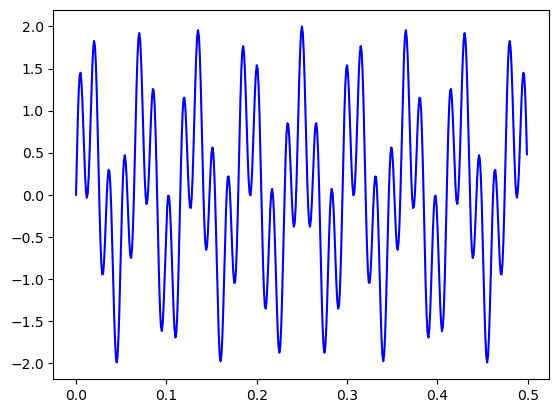

In [38]:
f1 = np.sin(2*np.pi*17*t) + np.sin(2*np.pi*61*t)
plt.plot(t,f1,color='b')

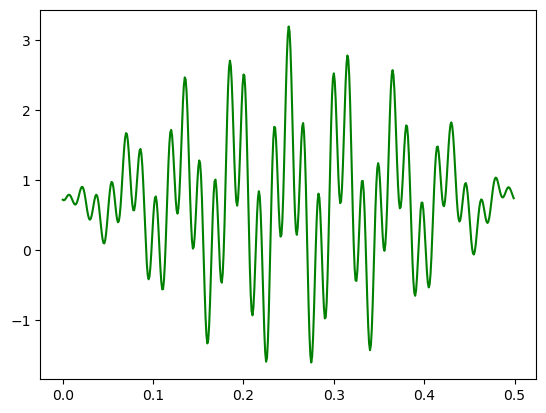

In [39]:
f1 = f1 + 1.4*np.random.random(len(t)) #non-gaussian noise is now added to test our program

f2 = de_Noiser(f1,t,dt)

In [40]:
#still works👍